In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
# importing dataset
df = pd.read_csv('/content/deliveries.csv')  # Change path if needed

In [43]:
#Data cleaning
df.dropna(subset=['match_no', 'over', 'noballs', 'striker', 'runs_of_bat'], inplace=True)
df.fillna({'player_dismissed':'None' , 'wicket_type': 'None', 'fielder': 'None', 'wide': 0, 'noballs': 0}, inplace=True)

In [44]:
df.describe()

,match_no,innings,over,runs_of_bat,extras,wide,legbyes,byes,noballs
count,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000
mean,12.963368,1.476727,9.479819,1.442279,0.073937,0.041338,0.011763,0.002016,0.003529
std,7.216624,0.499500,5.644933,1.812558,0.360548,0.199087,0.107825,0.044864,0.059304
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,1.000000,9.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,2.000000,14.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,2.000000,19.600000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team',
       'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide',
       'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed',
       'fielder'],
      dtype='object')

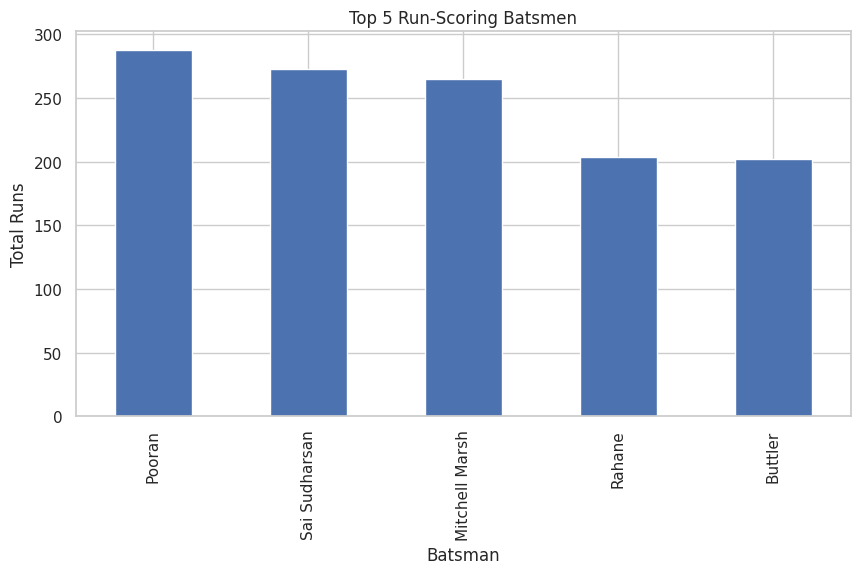

In [46]:
# 1. Top 5 batsmen
top_batsmen = df.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False).head(5)
top_batsmen.plot(kind='bar', title='Top 5 Run-Scoring Batsmen')
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.show()

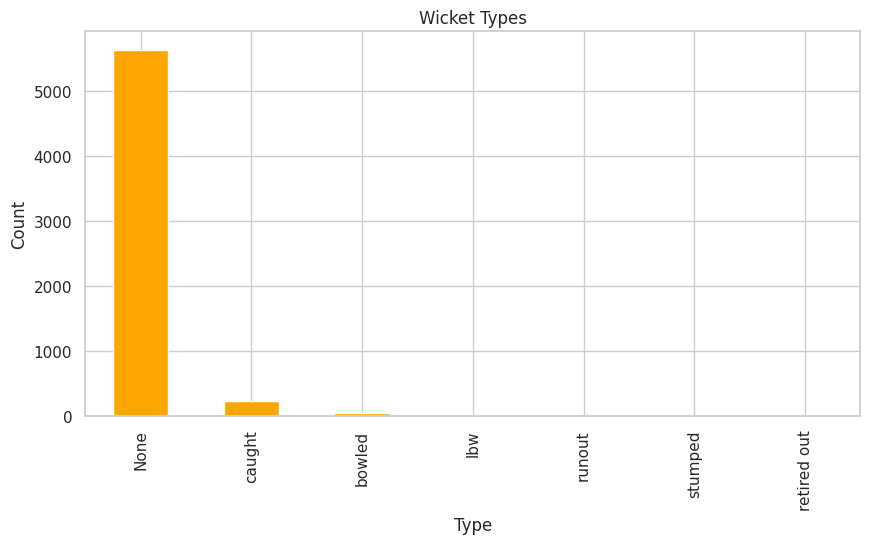

In [47]:
# 2. Wicket Types Count
wicket_types = df['wicket_type'].value_counts()
wicket_types.plot(kind='bar', color='orange')
plt.title('Wicket Types')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

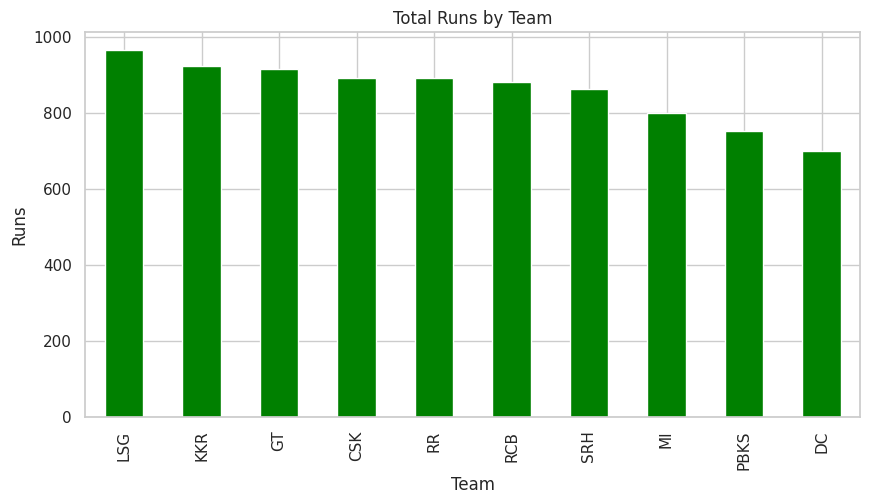

In [48]:
# 3. Team Runs
team_runs = df.groupby('batting_team')['runs_of_bat'].sum().sort_values(ascending=False)
team_runs.plot(kind='bar', color='green')
plt.title('Total Runs by Team')
plt.ylabel('Runs')
plt.xlabel('Team')
plt.show()

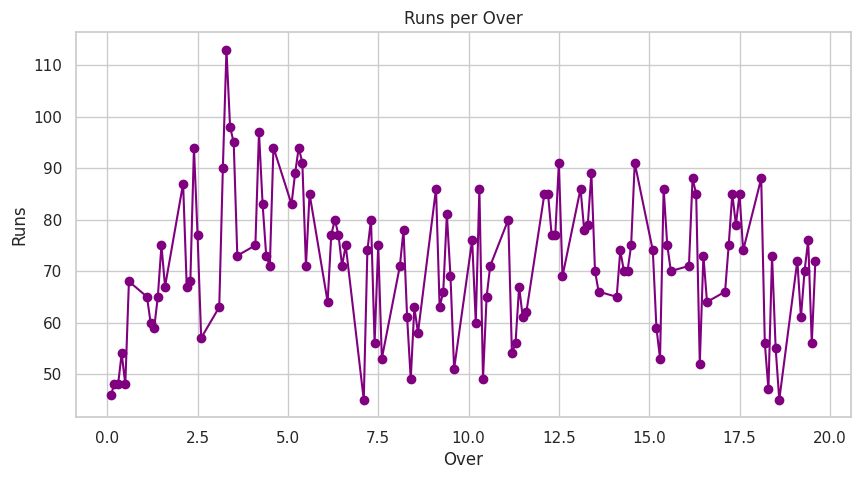

In [49]:
# 4. Runs per Over
runs_over = df.groupby('over')['runs_of_bat'].sum()
runs_over.plot(kind='line', marker='o', color='purple')
plt.title('Runs per Over')
plt.ylabel('Runs')
plt.xlabel('Over')
plt.grid(True)
plt.show()

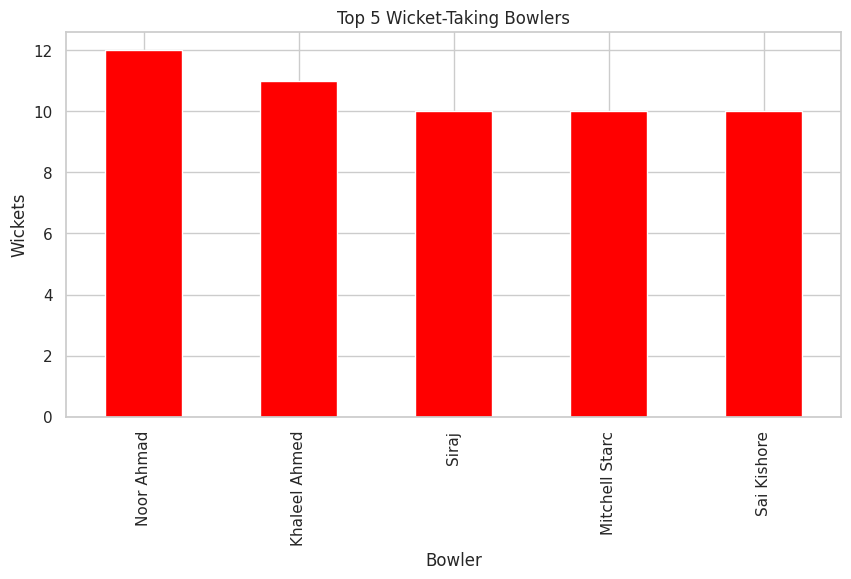

In [50]:
# 5. Top 5 Bowlers by Wickets
wickets = df[df['player_dismissed'] != 'None']
top_bowlers = wickets['bowler'].value_counts().head(5)
top_bowlers.plot(kind='bar', color='red')
plt.title('Top 5 Wicket-Taking Bowlers')
plt.ylabel('Wickets')
plt.xlabel('Bowler')
plt.show()

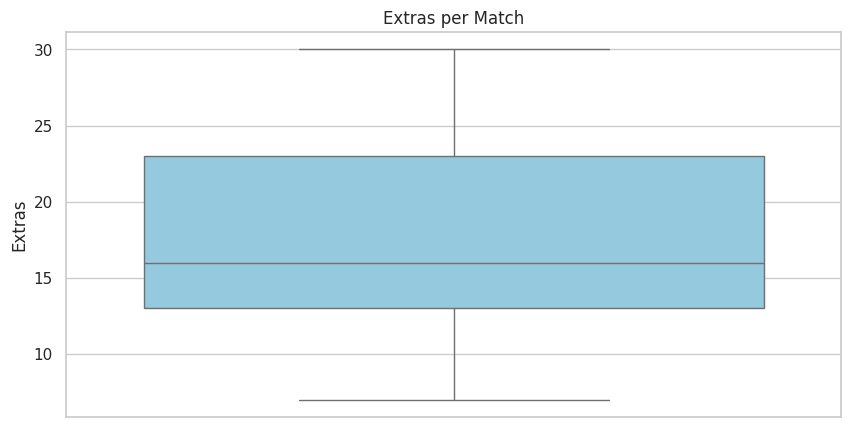

In [51]:
# 7. Match-wise extras distribution
match_extras = df.groupby('match_no')['extras'].sum()
sns.boxplot(y=match_extras, color='skyblue')
plt.title("Extras per Match")
plt.ylabel("Extras")
plt.show()

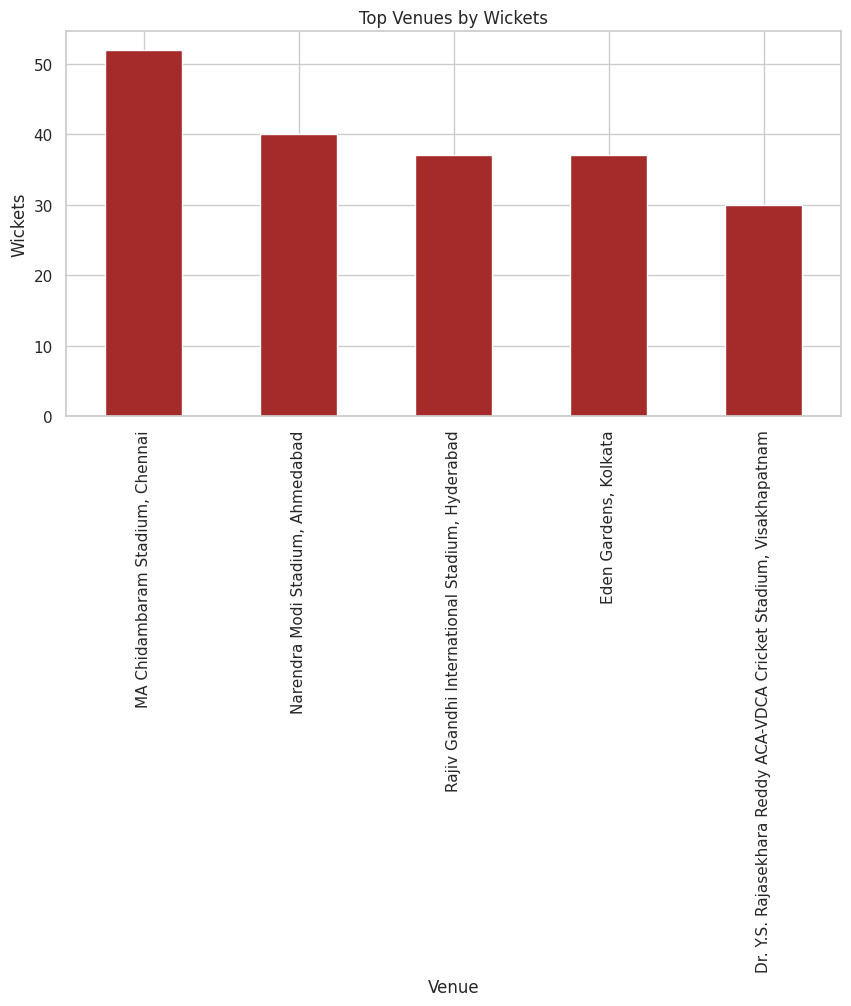

In [52]:
# 8. Wickets by venue
venue_wickets = wickets['venue'].value_counts().head(5)
venue_wickets.plot(kind='bar', color='brown', title='Top Venues by Wickets')
plt.xlabel("Venue")
plt.ylabel("Wickets")
plt.show()

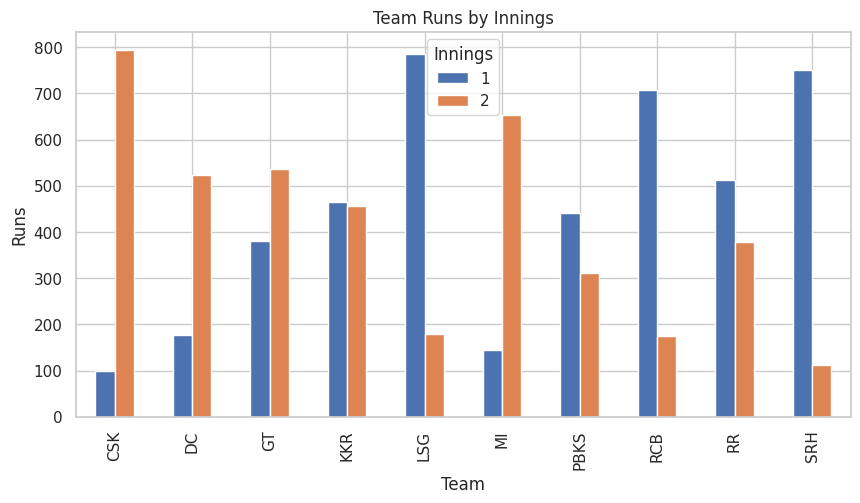

In [53]:
# 9. Team performance in 1st vs 2nd innings
innings_perf = df.groupby(['batting_team', 'innings'])['runs_of_bat'].sum().unstack()
innings_perf.plot(kind='bar', title='Team Runs by Innings')
plt.xlabel("Team")
plt.ylabel("Runs")
plt.legend(title="Innings")
plt.show()

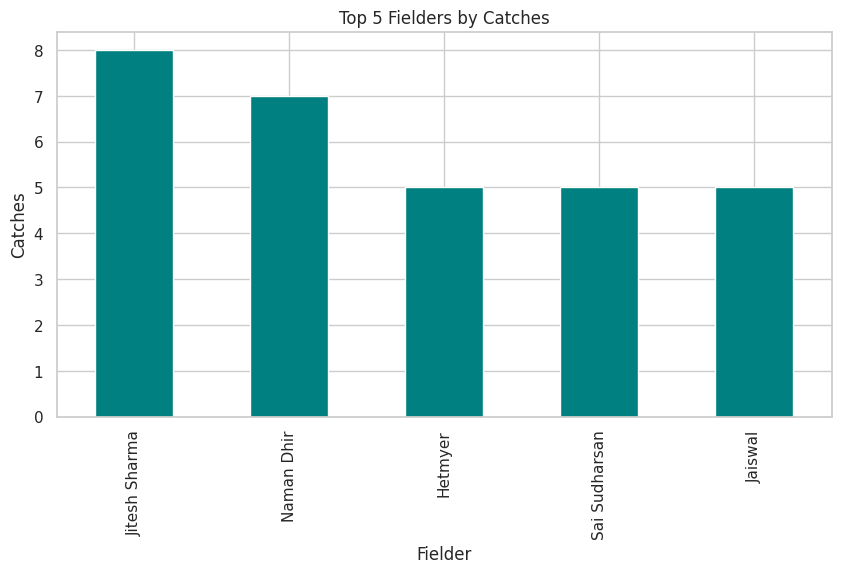

In [54]:
# 10. Top fielders by catches
catches = df[df['wicket_type'] == 'caught']
top_fielders = catches['fielder'].value_counts().head(5)
top_fielders.plot(kind='bar', color='teal', title='Top 5 Fielders by Catches')
plt.xlabel("Fielder")
plt.ylabel("Catches")
plt.show()